In [1]:
!ls /data/projects/nckf/cmip6/historical/EC-Earth3/

areacello	r11i1p1f1  r16i1p1f1  r20i1p1f1  r25i1p1f1  r6i1p1f1  script
daily_values	r12i1p1f1  r17i1p1f1  r21i1p1f1  r2i1p1f1   r7i1p1f1
ensmean_thetao	r13i1p1f1  r18i1p1f1  r22i1p1f1  r3i1p1f1   r8i1p1f1
Large_Ens_SMHI	r14i1p1f1  r19i1p1f1  r23i1p1f1  r4i1p1f1   r9i1p1f1
r10i1p1f1	r15i1p1f1  r1i1p1f1   r24i1p1f1  r5i1p1f1   readme


In [2]:
!ls /data/projects/nckf/

ang_ECE-PISM  hirham	      satellite-post-processing
annped	      ila	      shuting
chc	      max	      smb_carra
cissembel     mde	      smb_hclim
cmip6	      mol	      smb_hirham
danra	      msu	      smhi-assim-new-pred-system
DCENT	      nckf_satellite  tian
earthshine    obs_data	      twu
ece2cmor3     OptimESM_cmor   watlantic
ec-earth      pisco	      wfp
ecearth3_exp  polarPortal     WP4-1-pacemaker
frekle	      polarres
hclim	      reanalyses


In [8]:
!ls /data/projects/nckf/cmip6/historical/EC-Earth3/r1i1p1f1
!ls /data/projects/nckf/cmip6/historical/EC-Earth3/r3i1p1f1

Amon  day  Ofx	Omon  Osais  Oyear


Amon  Ofx  Omon  Osais	Oyear


In [3]:
!ls /data/projects/nckf/cmip6/historical/EC-Earth3/r3i1p1f1/Oyear/sos/

sos_Oyear_EC-Earth3_historical_r3i1p1f1_gn_1850-2014.nc


In [3]:
import xarray as xr

ds = xr.open_dataset("/data/projects/nckf/cmip6/historical/EC-Earth3/r1i1p1f1/Omon/sos/sos_Omon_EC-Earth3_historical_r1i1p1f1_gn_185001-201412.nc")
print(ds)           # summary of variables and dimensions
print(ds.data_vars)  # list of variables
print(ds.coords)     # list of coordinates

<xarray.Dataset> Size: 846MB
Dimensions:         (y: 292, x: 362, nv4: 4, time: 1980, bnds: 2)
Coordinates:
    longitude       (y, x) float64 846kB ...
    latitude        (y, x) float64 846kB ...
  * time            (time) datetime64[ns] 16kB 1850-01-16T12:00:00 ... 2014-1...
Dimensions without coordinates: y, x, nv4, bnds
Data variables:
    longitude_bnds  (y, x, nv4) float64 3MB ...
    latitude_bnds   (y, x, nv4) float64 3MB ...
    time_bnds       (time, bnds) datetime64[ns] 32kB ...
    sos             (time, y, x) float32 837MB ...
Attributes: (12/50)
    CDI:                                Climate Data Interface version ?? (ht...
    history:                            Wed May 05 11:52:40 2021: cdo mergeti...
    source:                             EC-Earth3 (2019): \naerosol: none\nat...
    institution:                        AEMET, Spain; BSC, Spain; CNR-ISAC, I...
    Conventions:                        CF-1.7 CMIP-6.2
    activity_id:                        CMIP
    ... 

In [4]:

import matplotlib.pyplot as plt

# Paths to member data
path_r1 = "/data/projects/nckf/cmip6/historical/EC-Earth3/r1i1p1f1/Omon/tos/*.nc"
path_r3 = "/data/projects/nckf/cmip6/historical/EC-Earth3/r3i1p1f1/Omon/tos/*.nc"

# Open as xarray datasets
ds_r1 = xr.open_mfdataset(path_r1, combine="by_coords")
ds_r3 = xr.open_mfdataset(path_r3, combine="by_coords")

# Select the SST variable (usually 'tos')
tos_r1 = ds_r1["tos"]
tos_r3 = ds_r3["tos"]


In [5]:
tos_mean = xr.concat([tos_r1, tos_r3], dim="member").mean(dim="member")


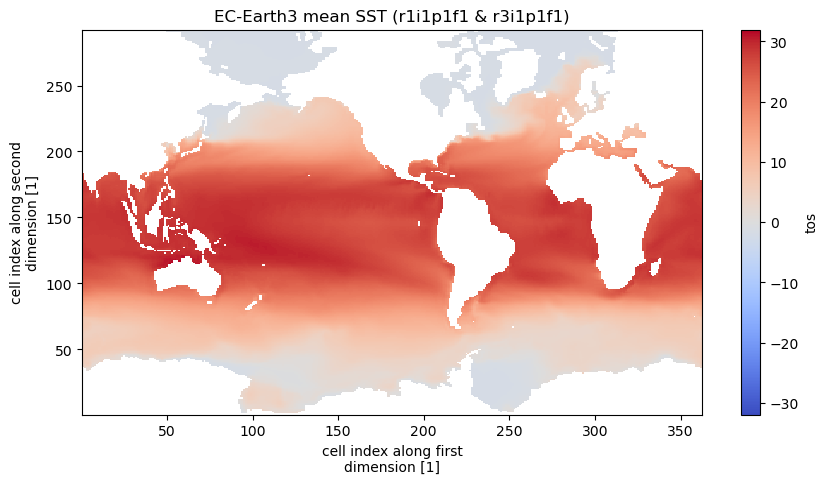

In [6]:
# Pick one timestep (first one as an example)
tos_mean.isel(time=0).plot(figsize=(10,5), cmap="coolwarm")
plt.title("EC-Earth3 mean SST (r1i1p1f1 & r3i1p1f1)")
plt.show()


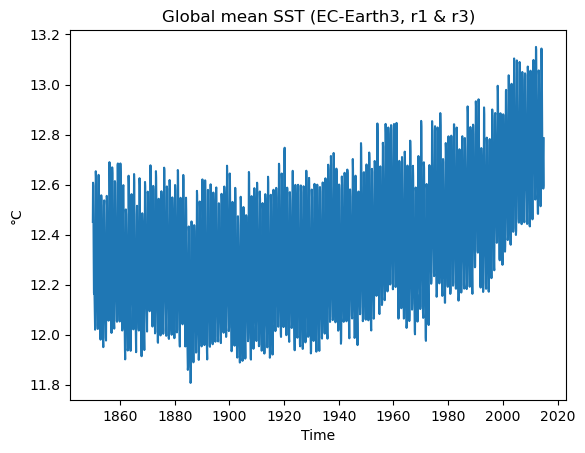

In [7]:
import numpy as np

lat = tos_mean.latitude
lon = tos_mean.longitude

# Compute weights: cosine of latitude in radians
weights = np.cos(np.deg2rad(lat))

# Normalize weights so they sum to 1 over the globe
weights = weights / weights.sum()

# Compute global mean for each time step
tos_global = (tos_mean * weights).sum(dim=["j","i"])

# Plot time series
tos_global.plot()
plt.title("Global mean SST (EC-Earth3, r1 & r3)")
plt.ylabel("°C")
plt.xlabel("Time")
plt.show()


In [8]:
# Assuming tos_global has 'time' dimension
tos_global_yearly = tos_global.resample(time="Y").mean()


/dmidata/users/frekle/miniforge3/envs/aimoc_env/lib/python3.11/site-packages/xarray/groupers.py:530: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


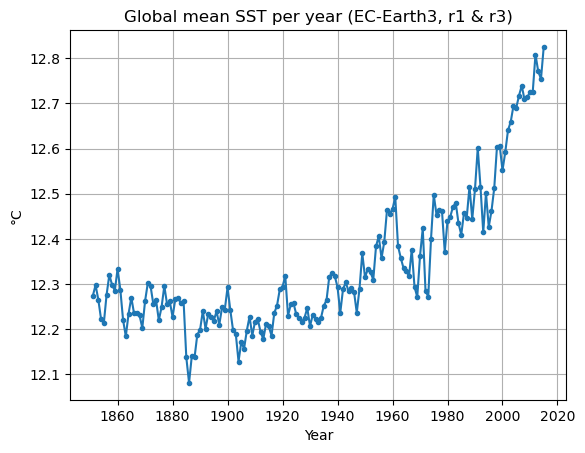

In [9]:
tos_global_yearly.plot(marker=".")
plt.title("Global mean SST per year (EC-Earth3, r1 & r3)")
plt.ylabel("°C")
plt.xlabel("Year")
plt.grid(True)
plt.show()


/dmidata/users/frekle/miniforge3/envs/aimoc_env/lib/python3.11/site-packages/xarray/groupers.py:530: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


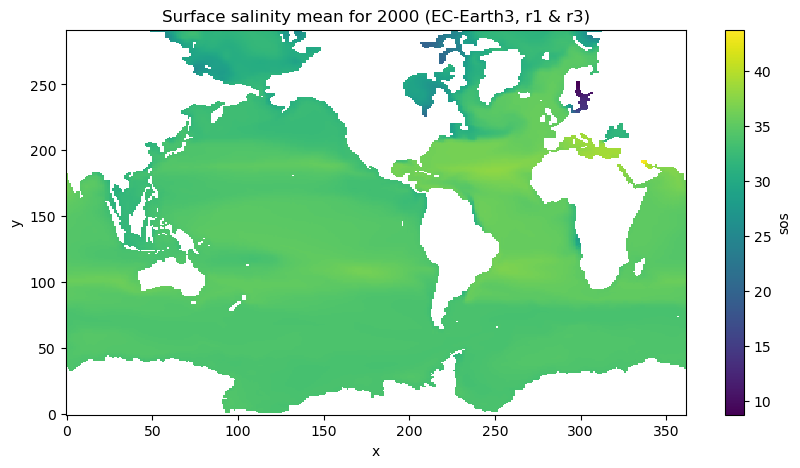

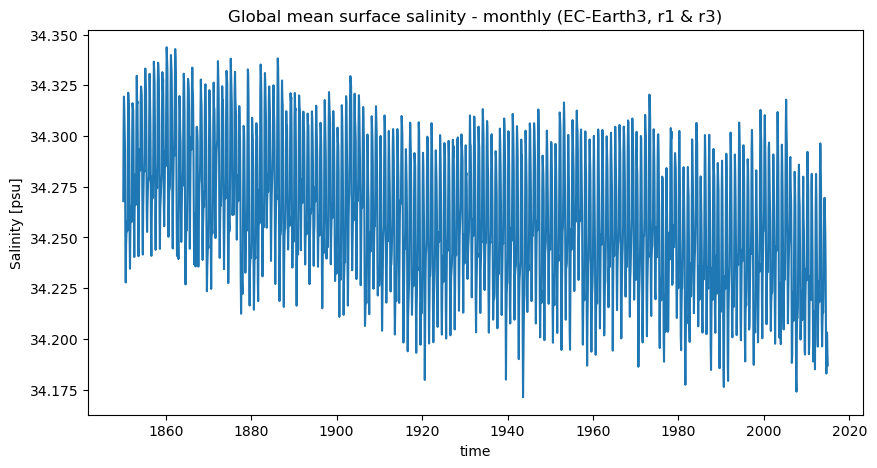

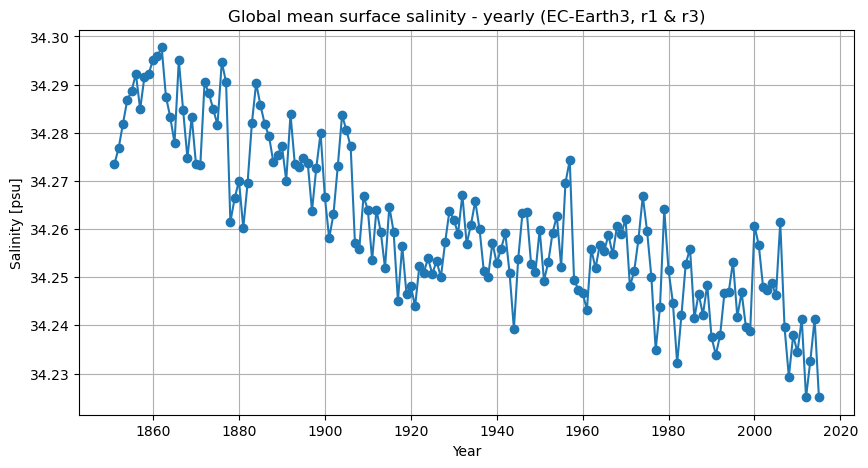

In [9]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# User parameters
# -------------------------------
year_of_interest = 2000   # change this to the year you want

# -------------------------------
# 1. Open the two ensemble members
# -------------------------------
file_r1 = "/data/projects/nckf/cmip6/historical/EC-Earth3/r1i1p1f1/Omon/sos/*.nc"
file_r3 = "/data/projects/nckf/cmip6/historical/EC-Earth3/r3i1p1f1/Omon/sos/*.nc"

ds_r1 = xr.open_mfdataset(file_r1, combine="by_coords")
ds_r3 = xr.open_mfdataset(file_r3, combine="by_coords")

sos_r1 = ds_r1["sos"]
sos_r3 = ds_r3["sos"]

# -------------------------------
# 2. Compute ensemble mean
# -------------------------------
sos_mean = (sos_r1 + sos_r3) / 2

# -------------------------------
# 3. Compute global mean (area-weighted) over all months
# -------------------------------
spatial_dims = [d for d in sos_mean.dims if d not in ["time", "bnds", "vertices"]]
weights = np.cos(np.deg2rad(sos_mean["latitude"]))

sos_global_monthly = sos_mean.weighted(weights).mean(dim=spatial_dims)
sos_global_yearly = sos_global_monthly.resample(time="Y").mean()

# -------------------------------
# 4. Select the year of interest and compute its annual mean map
# -------------------------------
sos_year = sos_mean.sel(time=slice(f"{year_of_interest}-01-01", f"{year_of_interest}-12-31"))
sos_year_mean = sos_year.mean(dim="time")  # mean over all months of that year

# -------------------------------
# 5. Plot spatial mean map for the year
# -------------------------------
plt.figure(figsize=(10,5))
sos_year_mean.plot(cmap="viridis")
plt.title(f"Surface salinity mean for {year_of_interest} (EC-Earth3, r1 & r3)")
plt.show()

# -------------------------------
# 6. Plot monthly global mean
# -------------------------------
plt.figure(figsize=(10,5))
sos_global_monthly.plot()
plt.title("Global mean surface salinity - monthly (EC-Earth3, r1 & r3)")
plt.ylabel("Salinity [psu]")
plt.show()

# -------------------------------
# 7. Plot yearly global mean
# -------------------------------
plt.figure(figsize=(10,5))
sos_global_yearly.plot(marker="o")
plt.title("Global mean surface salinity - yearly (EC-Earth3, r1 & r3)")
plt.ylabel("Salinity [psu]")
plt.xlabel("Year")
plt.grid(True)
plt.show()


In [5]:
import xarray as xr

# Path to your monthly mlotst file
monthly_file = "/data/projects/nckf/frekle/CMIP6_data/mlotst/mlotst_Omon_EC-Earth3_historical_r1i1p1f1_gn_185001-201412.nc"

# Open dataset
ds = xr.open_dataset(monthly_file, use_cftime=True)

# Check variables and dimensions
print(ds)


<xarray.Dataset> Size: 846MB
Dimensions:         (time: 1980, bnds: 2, j: 292, i: 362, vertices: 4)
Coordinates:
  * time            (time) object 16kB 1850-01-16 12:00:00 ... 2014-12-16 12:...
    longitude       (j, i) float64 846kB ...
    latitude        (j, i) float64 846kB ...
  * i               (i) int32 1kB 1 2 3 4 5 6 7 ... 356 357 358 359 360 361 362
  * j               (j) int32 1kB 1 2 3 4 5 6 7 ... 286 287 288 289 290 291 292
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds       (time, bnds) object 32kB ...
    longitude_bnds  (j, i, vertices) float64 3MB ...
    latitude_bnds   (j, i, vertices) float64 3MB ...
    mlotst          (time, j, i) float32 837MB ...
Attributes: (12/50)
    CDI:                                Climate Data Interface version 1.9.9r...
    history:                            Wed May 25 12:01:17 2022: cdo mergeti...
    source:                             EC-Earth3 (2019): \naerosol: none\nat...
    institution:        

/tmp/ipykernel_2364520/2477083937.py:7: DeprecationWarning: Usage of 'use_cftime' as a kwarg is deprecated. Please pass a 'CFDatetimeCoder' instance initialized with 'use_cftime' to the 'decode_times' kwarg instead.
Example usage:
    time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)
    ds = xr.open_dataset(decode_times=time_coder)

  ds = xr.open_dataset(monthly_file, use_cftime=True)


In [6]:
# Assume 'mlotst' is the variable name and 'time' is the monthly time coordinate
mlotst_yearly = ds['mlotst'].resample(time='Y').mean(dim='time')

# Optional: check result
print(mlotst_yearly)


<string>:7: FutureWarning: 'Y' is deprecated and will be removed in a future version. Please use 'YE' instead of 'Y'.


<xarray.DataArray 'mlotst' (time: 165, j: 292, i: 362)> Size: 70MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., 

In [7]:
output_file = "/data/projects/nckf/frekle/CMIP6_data/mlotst/mlotst_Oyear_EC-Earth3_historical_r1i1p1f1_gn_185001-201412.nc"
mlotst_yearly.to_netcdf(output_file)

print(f"Yearly mlotst saved to: {output_file}")


Yearly mlotst saved to: /data/projects/nckf/frekle/CMIP6_data/mlotst/mlotst_Oyear_EC-Earth3_historical_r1i1p1f1_gn_185001-201412.nc


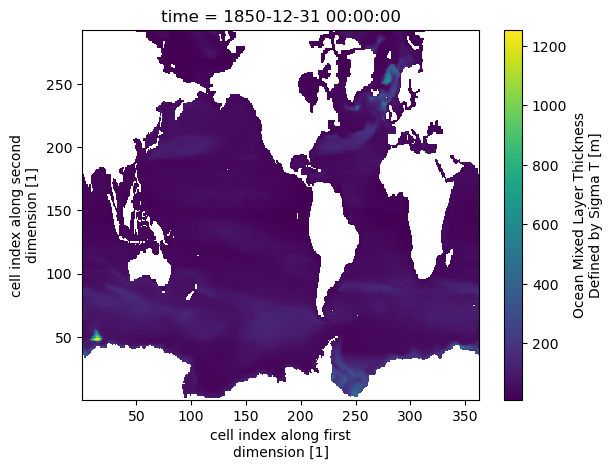

In [8]:
mlotst_yearly.isel(time=0).plot()  # plot the first year's MLD
